In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [5]:
ruta = './data/clean/'

In [6]:
ruta

'./data/clean/'

# Estadisticas descriptivas

In [109]:
df_med_prin = pd.read_csv(ruta+"med_principal_clean.csv", encoding="utf-8")

In [110]:
df_var_clim = pd.read_csv(ruta+"data_met_edif_lit_clean.csv", encoding="utf-8")

In [111]:
df_med_prin = df_med_prin.loc[:,['tiempo', 'energia_activa']]

In [112]:
df_med_prin

tiempo  energia_activa
0       2017-01-01 00:00:00           205.8
1       2017-01-01 00:15:00           205.8
2       2017-01-01 00:30:00           210.0
3       2017-01-01 00:45:00           205.8
4       2017-01-01 01:00:00           205.8
...                     ...             ...
136892  2020-12-17 23:00:00           184.8
136893  2020-12-17 23:15:00           189.0
136894  2020-12-17 23:30:00           189.0
136895  2020-12-17 23:45:00           184.8
136896  2020-12-18 00:00:00           184.8

[136897 rows x 2 columns]

In [113]:
df_med_prin.describe()

energia_activa
count   136897.000000
mean       360.471749
std        255.620156
min          0.000000
25%        201.600000
50%        226.800000
75%        415.800000
max       1260.000000

In [114]:
df_med_prin.dtypes

tiempo             object
energia_activa    float64
dtype: object

In [115]:
df_var_clim.dtypes

tiempo               object
TempCelcius         float64
HR                  float64
Lluviamm            float64
Dirdelviento        float64
Veldelviento_m/s    float64
Velderafagas_m/s    float64
dtype: object

In [116]:
df_var_clim.head()

tiempo  TempCelcius    HR  Lluviamm  Dirdelviento  \
0  2016-01-21 02:00:00       25.817  87.9       0.0         146.0   
1  2016-01-21 02:10:00       25.671  88.3       0.0         181.1   
2  2016-01-21 02:20:00       25.623  88.7       0.0         164.3   
3  2016-01-21 02:30:00       25.623  88.9       0.0         181.1   
4  2016-01-21 02:40:00       25.598  89.1       0.0         151.6   

   Veldelviento_m/s  Velderafagas_m/s  
0           -888.88           -888.88  
1           -888.88           -888.88  
2           -888.88           -888.88  
3           -888.88           -888.88  
4           -888.88           -888.88

## Agrupamiento y graficas de la data

1. Por Hora, Consumo por la suma por hora, variable climatica la media

In [117]:
df_var_clim.dtypes

tiempo               object
TempCelcius         float64
HR                  float64
Lluviamm            float64
Dirdelviento        float64
Veldelviento_m/s    float64
Velderafagas_m/s    float64
dtype: object

In [118]:
df_med_prin.dtypes

tiempo             object
energia_activa    float64
dtype: object

In [119]:
df_var_clim['tiempo'] = pd.to_datetime(df_var_clim['tiempo'])

In [120]:
df_var_clim.dtypes

tiempo              datetime64[ns]
TempCelcius                float64
HR                         float64
Lluviamm                   float64
Dirdelviento               float64
Veldelviento_m/s           float64
Velderafagas_m/s           float64
dtype: object

In [121]:
df_med_prin['tiempo'] = pd.to_datetime(df_med_prin['tiempo'])

In [122]:
df_med_prin.dtypes

tiempo            datetime64[ns]
energia_activa           float64
dtype: object

In [123]:
lista_columnas = df_med_prin.columns

In [124]:
lista_comum_clima = df_var_clim.columns

In [125]:
lista_columnas

Index(['tiempo', 'energia_activa'], dtype='object')

In [126]:
frecuencia_agrupamieto = 'H'

In [127]:
frecuencia_agrupamieto

'H'

In [128]:
df_med_prin_agrupado=df_med_prin.groupby(pd.Grouper(key='tiempo', freq=frecuencia_agrupamieto))[lista_columnas].sum().reset_index()

In [129]:
df_var_clim_agrupado=df_var_clim.groupby(pd.Grouper(key='tiempo', freq=frecuencia_agrupamieto))[lista_comum_clima].mean().reset_index()

In [130]:
df_med_prin_agrupado

tiempo  energia_activa
0     2017-01-01 00:00:00           827.4
1     2017-01-01 01:00:00           814.8
2     2017-01-01 02:00:00           798.0
3     2017-01-01 03:00:00           802.2
4     2017-01-01 04:00:00           793.8
...                   ...             ...
34724 2020-12-17 20:00:00           806.4
34725 2020-12-17 21:00:00           768.6
34726 2020-12-17 22:00:00           760.2
34727 2020-12-17 23:00:00           747.6
34728 2020-12-18 00:00:00           184.8

[34729 rows x 2 columns]

In [131]:
df_var_clim_agrupado

tiempo  TempCelcius         HR  Lluviamm  Dirdelviento  \
0     2016-01-21 02:00:00    25.642833  88.700000       0.0    171.283333   
1     2016-01-21 03:00:00    25.452667  90.183333       0.0    180.883333   
2     2016-01-21 04:00:00    25.020500  91.533333       0.0    186.933333   
3     2016-01-21 05:00:00    24.222833  93.550000       0.0    193.266667   
4     2016-01-21 06:00:00    24.231000  94.416667       0.0    191.650000   
...                   ...          ...        ...       ...           ...   
39580 2020-07-27 06:00:00    20.646333  93.816667       0.0    205.433333   
39581 2020-07-27 07:00:00    21.151167  92.733333       0.0    205.233333   
39582 2020-07-27 08:00:00    22.429667  89.766667       0.0    183.916667   
39583 2020-07-27 09:00:00    23.336333  86.366667       0.0    173.833333   
39584 2020-07-27 10:00:00    24.219000  85.200000       0.0    127.800000   

       Veldelviento_m/s  Velderafagas_m/s  
0           -888.880000       -888.880000  
1           -888.880000       -888.880000  
2           -888.880000       -888.880000  
3           -888.880000       -888.880000  
4           -888.880000       -888.880000  
...                 ...               ...  
39580          0.250000          2.015000  
39581          0.416667          2.351667  
39582          0.883333          3.063333  
39583          1.051667          3.146667  
39584          0.500000          2.010000  

[39585 rows x 7 columns]

In [132]:
x_med_min=df_med_prin_agrupado['tiempo'].min()

In [133]:
x_med_min

Timestamp('2017-01-01 00:00:00')

In [134]:
x_med_max=df_med_prin_agrupado['tiempo'].max()

In [135]:
x_med_max

Timestamp('2020-12-18 00:00:00')

In [136]:
x_clim_min =df_var_clim_agrupado['tiempo'].min()

In [137]:
x_clim_min

Timestamp('2016-01-21 02:00:00')

In [138]:
x_clim_max = df_var_clim_agrupado['tiempo'].max()

In [139]:
x_clim_max

Timestamp('2020-07-27 10:00:00')

In [140]:
x_min = [x_med_min, x_clim_min]

In [141]:
max(x_min)

Timestamp('2017-01-01 00:00:00')

In [142]:
x_med_min = [x_med_max, x_clim_max]

In [143]:
min(x_med_min)

Timestamp('2020-07-27 10:00:00')

In [144]:
df1= df_med_prin_agrupado[(df_med_prin_agrupado['tiempo'] >= max(x_min)) & (df_med_prin_agrupado['tiempo'] <= min(x_med_min))]

In [145]:
df2 = df_var_clim_agrupado[(df_var_clim_agrupado['tiempo'] >= max(x_min)) & (df_var_clim_agrupado['tiempo'] <= min(x_med_min))]

In [146]:
df_total = df1.join(df2.set_index('tiempo'), on='tiempo')

In [147]:
df_total.to_csv(ruta+'dataset_consumo_clima.csv',index=False)

In [148]:
df_total = df_total.set_index("tiempo")# create new columns from datetime index
df_total["year"] = df_total.index.year
df_total["week"] = df_total.index.week
df_total["month"] = df_total.index.month# new dataframe
df_total["day"] = df_total.index.day# new day
df_total["hour"] = df_total.index.hour# new day

C:\Users\FRANCI~1\AppData\Local\Temp/ipykernel_9332/2297632638.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_total["week"] = df_total.index.week


In [156]:
df_total.head(100)

energia_activa  TempCelcius         HR  Lluviamm  \
tiempo                                                                  
2017-01-01 00:00:00           827.4    25.881833  80.133333       0.0   
2017-01-01 01:00:00           814.8    25.748167  80.750000       0.0   
2017-01-01 02:00:00           798.0    25.800667  77.250000       0.0   
2017-01-01 03:00:00           802.2    25.715500  76.050000       0.0   
2017-01-01 04:00:00           793.8    25.525500  77.200000       0.0   
...                             ...          ...        ...       ...   
2017-01-04 23:00:00           924.0    26.231333  75.566667       0.0   
2017-01-05 00:00:00           924.0    25.833167  79.033333       0.0   
2017-01-05 01:00:00           907.2    25.379833  82.533333       0.0   
2017-01-05 02:00:00           894.6    25.303000  83.800000       0.0   
2017-01-05 03:00:00           903.0    25.153500  84.483333       0.0   

                     Dirdelviento  Veldelviento_m/s  Velderafagas_m/s  year  \
tiempo                                                                        
2017-01-01 00:00:00    203.100000           -888.88           -888.88  2017   
2017-01-01 01:00:00    188.816667           -888.88           -888.88  2017   
2017-01-01 02:00:00    156.300000           -888.88           -888.88  2017   
2017-01-01 03:00:00    157.950000           -888.88           -888.88  2017   
2017-01-01 04:00:00    202.616667           -888.88           -888.88  2017   
...                           ...               ...               ...   ...   
2017-01-04 23:00:00    198.166667           -888.88           -888.88  2017   
2017-01-05 00:00:00    192.583333           -888.88           -888.88  2017   
2017-01-05 01:00:00    219.933333           -888.88           -888.88  2017   
2017-01-05 02:00:00    148.816667           -888.88           -888.88  2017   
2017-01-05 03:00:00    184.383333           -888.88           -888.88  2017   

                     week  month  day  hour  
tiempo                                       
2017-01-01 00:00:00    52      1    1     0  
2017-01-01 01:00:00    52      1    1     1  
2017-01-01 02:00:00    52      1    1     2  
2017-01-01 03:00:00    52      1    1     3  
2017-01-01 04:00:00    52      1    1     4  
...                   ...    ...  ...   ...  
2017-01-04 23:00:00     1      1    4    23  
2017-01-05 00:00:00     1      1    5     0  
2017-01-05 01:00:00     1      1    5     1  
2017-01-05 02:00:00     1      1    5     2  
2017-01-05 03:00:00     1      1    5     3  

[100 rows x 12 columns]

In [157]:
from datetime import datetime

In [158]:
df_total = df_total.reset_index()

In [159]:
df_total.loc[0,'tiempo'].weekday()

6

Integer Value
	

Day of the week

0 Monday

1 Tuesday

2 Wednesday

3 Thursday

4 Friday

5 Saturday

6 Sunday

In [160]:
def dayNameFromWeekday(weekday):
    if weekday == 0:
        return "Monday"
    if weekday == 1:
        return "Tuesday"
    if weekday == 2:
        return "Wednesday"
    if weekday == 3:
        return "Thursday"
    if weekday == 4:
        return "Friday"
    if weekday == 5:
        return "Saturday"
    if weekday == 6:
        return "Sunday"


In [161]:
dayNameFromWeekday(0)

'Monday'

In [162]:
df_total['weekday'] = df_total.apply(lambda row : row['tiempo'].weekday(), axis=1)

In [163]:
df_total.to_csv(ruta+'dataset_consumo_clima.csv',index=False)

In [164]:
df_total

tiempo  energia_activa  TempCelcius         HR  Lluviamm  \
0     2017-01-01 00:00:00           827.4    25.881833  80.133333       0.0   
1     2017-01-01 01:00:00           814.8    25.748167  80.750000       0.0   
2     2017-01-01 02:00:00           798.0    25.800667  77.250000       0.0   
3     2017-01-01 03:00:00           802.2    25.715500  76.050000       0.0   
4     2017-01-01 04:00:00           793.8    25.525500  77.200000       0.0   
...                   ...             ...          ...        ...       ...   
31278 2020-07-27 06:00:00           638.4    20.646333  93.816667       0.0   
31279 2020-07-27 07:00:00           709.8    21.151167  92.733333       0.0   
31280 2020-07-27 08:00:00           856.8    22.429667  89.766667       0.0   
31281 2020-07-27 09:00:00           978.6    23.336333  86.366667       0.0   
31282 2020-07-27 10:00:00           982.8    24.219000  85.200000       0.0   

       Dirdelviento  Veldelviento_m/s  Velderafagas_m/s  year  week  month  \
0        203.100000       -888.880000       -888.880000  2017    52      1   
1        188.816667       -888.880000       -888.880000  2017    52      1   
2        156.300000       -888.880000       -888.880000  2017    52      1   
3        157.950000       -888.880000       -888.880000  2017    52      1   
4        202.616667       -888.880000       -888.880000  2017    52      1   
...             ...               ...               ...   ...   ...    ...   
31278    205.433333          0.250000          2.015000  2020    31      7   
31279    205.233333          0.416667          2.351667  2020    31      7   
31280    183.916667          0.883333          3.063333  2020    31      7   
31281    173.833333          1.051667          3.146667  2020    31      7   
31282    127.800000          0.500000          2.010000  2020    31      7   

       day  hour  weekday  
0        1     0        6  
1        1     1        6  
2        1     2        6  
3        1     3        6  
4        1     4        6  
...    ...   ...      ...  
31278   27     6        0  
31279   27     7        0  
31280   27     8        0  
31281   27     9        0  
31282   27    10        0  

[31283 rows x 14 columns]

In [165]:
lista_columnas_1 = ['energia_activa', 'TempCelcius', 'HR']

In [166]:
#frecuencia_agrupamieto = 'M'

In [167]:
df_total_agrupado=df_total.groupby(pd.Grouper(key='tiempo', freq=frecuencia_agrupamieto))[lista_columnas_1].mean().reset_index()

In [168]:
df_total_agrupado.head(5)

tiempo  energia_activa  TempCelcius         HR
0 2017-01-01 00:00:00           827.4    25.881833  80.133333
1 2017-01-01 01:00:00           814.8    25.748167  80.750000
2 2017-01-01 02:00:00           798.0    25.800667  77.250000
3 2017-01-01 03:00:00           802.2    25.715500  76.050000
4 2017-01-01 04:00:00           793.8    25.525500  77.200000

<AxesSubplot:xlabel='tiempo', ylabel='energia_activa'>

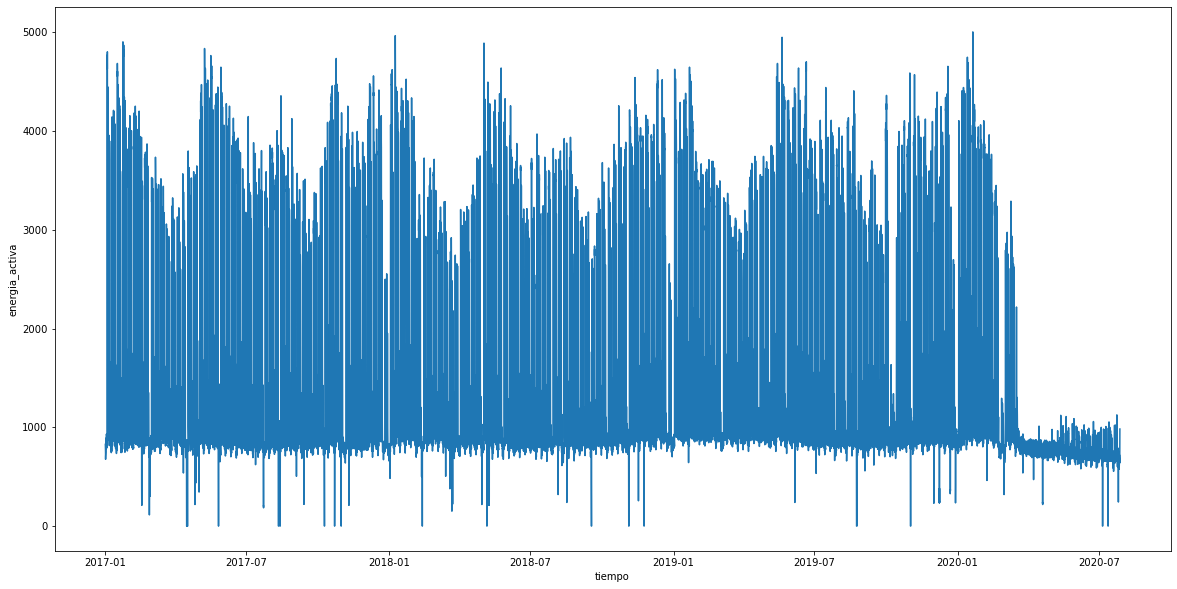

In [169]:
fig, axs = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_total_agrupado , x='tiempo', y='energia_activa')

<AxesSubplot:xlabel='tiempo', ylabel='TempCelcius'>

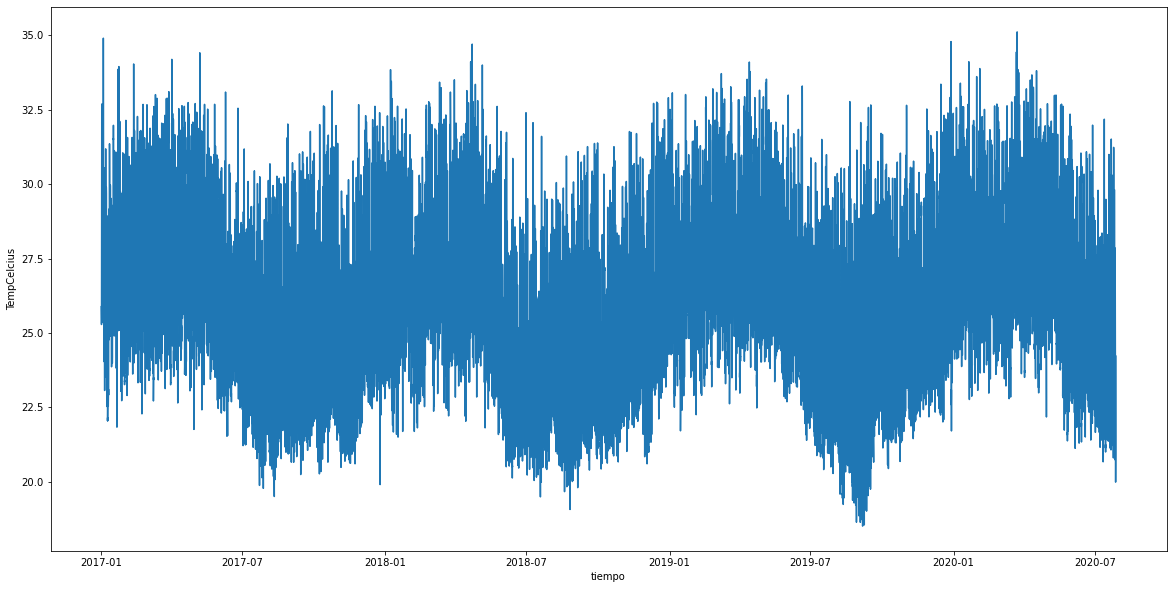

In [170]:
fig, axs = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_total_agrupado , x='tiempo', y='TempCelcius')

<AxesSubplot:xlabel='tiempo', ylabel='HR'>

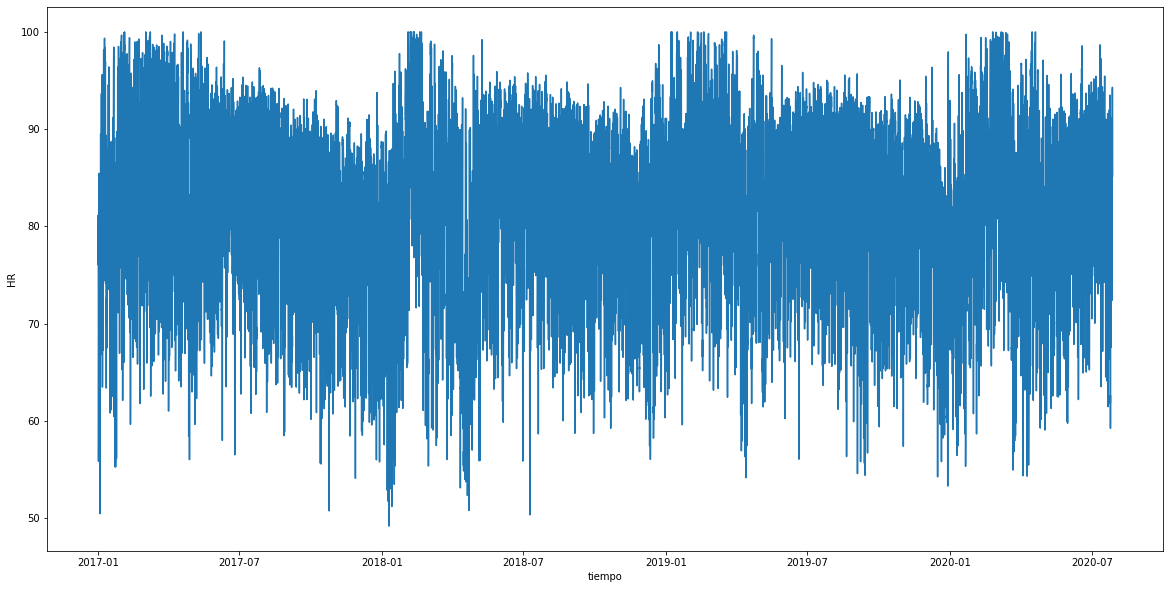

In [171]:
fig, axs = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_total_agrupado , x='tiempo', y='HR')


# Boxplots y Correlación entre consumo y Variables Climáticas

In [172]:
df_total.loc[:,'energia_activa'][df_total['year'] == 2017].mean()

1593.1870547945189

<AxesSubplot:xlabel='month', ylabel='energia_activa'>

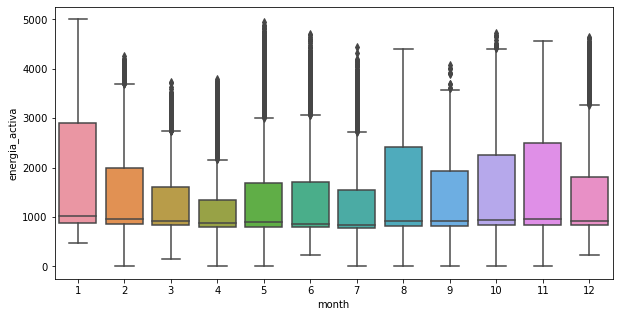

In [173]:
# boxplots by month
fig, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'month', y='energia_activa', data = df_total)

<AxesSubplot:xlabel='month', ylabel='TempCelcius'>

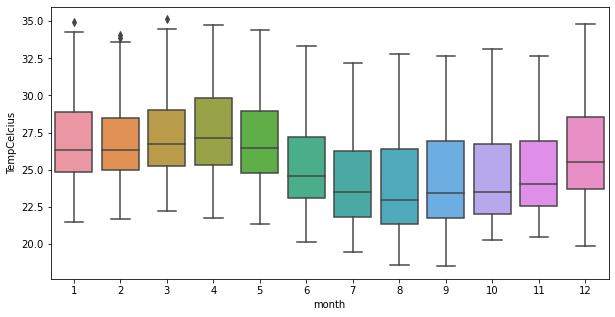

In [174]:
# boxplots by month
fig, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'month', y='TempCelcius', data = df_total)

<AxesSubplot:xlabel='hour', ylabel='HR'>

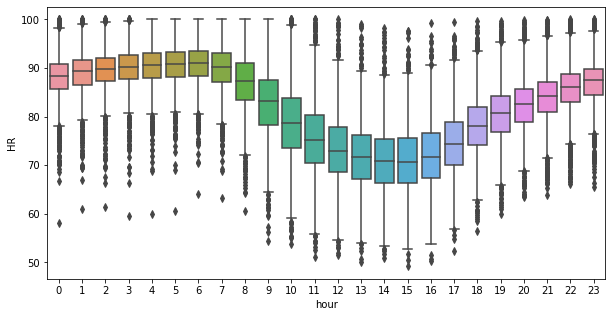

In [175]:
# boxplots by month
fig, axs = plt.subplots(figsize=(10,5))
sns.boxplot(x = 'hour', y='HR', data = df_total)

In [176]:
df_total.head(1)

tiempo  energia_activa  TempCelcius         HR  Lluviamm  Dirdelviento  \
0 2017-01-01           827.4    25.881833  80.133333       0.0         203.1   

   Veldelviento_m/s  Velderafagas_m/s  year  week  month  day  hour  weekday  
0           -888.88           -888.88  2017    52      1    1     0        6

In [177]:
df_variables_analisis=df_total.loc[:,['tiempo', 'energia_activa', 'TempCelcius', 'HR', 'Lluviamm','Dirdelviento','Veldelviento_m/s','Velderafagas_m/s']]

In [178]:
correlation_mat = df_variables_analisis.corr()

In [179]:
correlation_mat

energia_activa  TempCelcius        HR  Lluviamm  \
energia_activa          1.000000     0.469467 -0.427096 -0.039756   
TempCelcius             0.469467     1.000000 -0.787903 -0.060839   
HR                     -0.427096    -0.787903  1.000000  0.148997   
Lluviamm               -0.039756    -0.060839  0.148997  1.000000   
Dirdelviento           -0.131226    -0.094774  0.139010  0.043933   
Veldelviento_m/s       -0.038789    -0.094018 -0.073386 -0.084584   
Velderafagas_m/s       -0.038776    -0.094444 -0.073970 -0.084745   

                  Dirdelviento  Veldelviento_m/s  Velderafagas_m/s  
energia_activa       -0.131226         -0.038789         -0.038776  
TempCelcius          -0.094774         -0.094018         -0.094444  
HR                    0.139010         -0.073386         -0.073970  
Lluviamm              0.043933         -0.084584         -0.084745  
Dirdelviento          1.000000         -0.045999         -0.046064  
Veldelviento_m/s     -0.045999          1.000000          0.999993  
Velderafagas_m/s     -0.046064          0.999993          1.000000

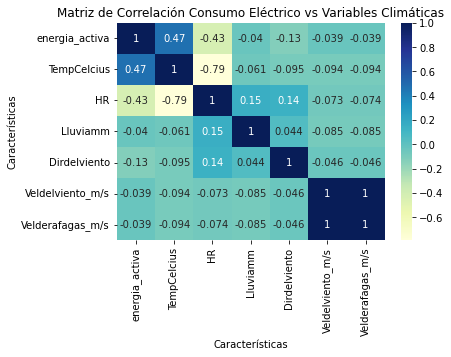

In [180]:
sns.heatmap(correlation_mat, annot = True, cmap="YlGnBu")
plt.title("Matriz de Correlación Consumo Eléctrico vs Variables Climáticas")
plt.xlabel("Características")
plt.ylabel("Características")
plt.show()

<AxesSubplot:xlabel='TempCelcius', ylabel='energia_activa'>

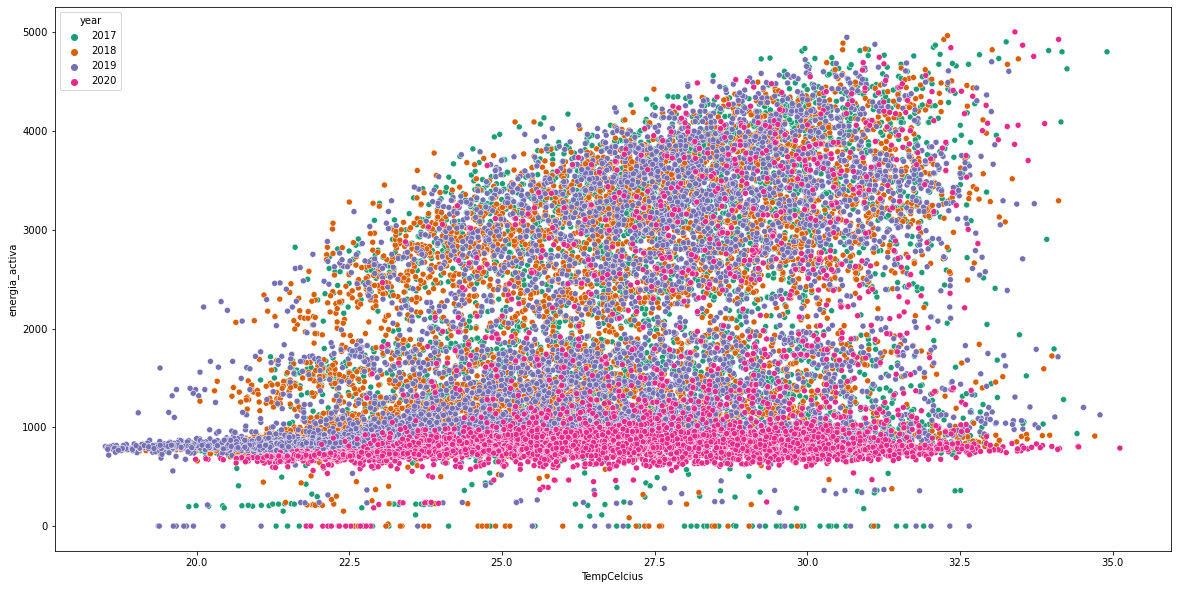

In [181]:
fig, axs = plt.subplots(figsize=(20,10))
sns.scatterplot(y="energia_activa", x='TempCelcius', data=df_total, hue="year", palette="Dark2")

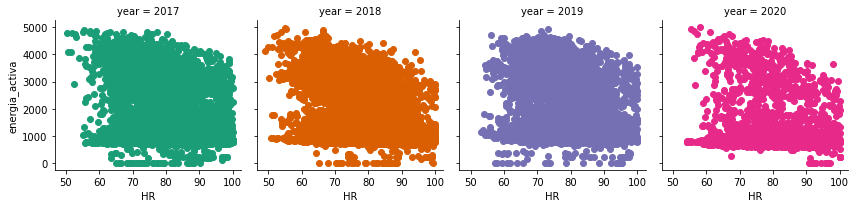

In [182]:
grid = sns.FacetGrid(df_total, col="year", hue="year", palette="Dark2")
grid.map(plt.scatter,'HR','energia_activa')
plt.show()

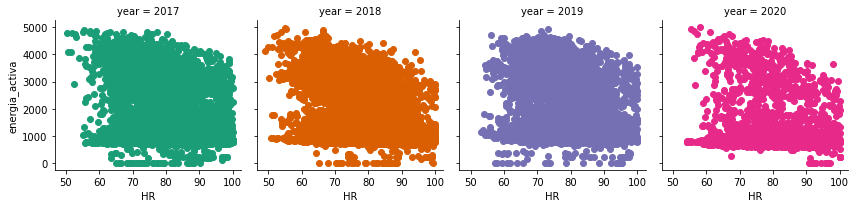

In [183]:
grid = sns.FacetGrid(df_total, col="year", hue="year", palette="Dark2")
grid.map(plt.scatter,'HR','energia_activa')
plt.show()

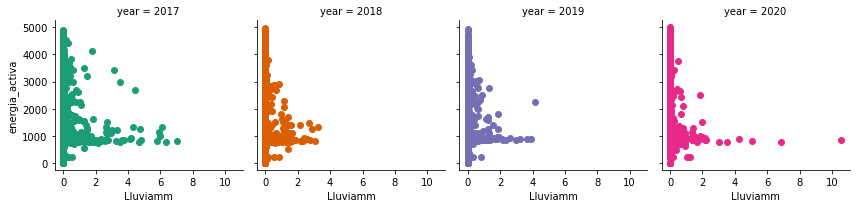

In [184]:
grid = sns.FacetGrid(df_total, col="year", hue="year", palette="Dark2")
grid.map(plt.scatter,'Lluviamm','energia_activa')
plt.show()

In [185]:
tiempo = "hour" # "year" "month" "day" "hour" "weekday"

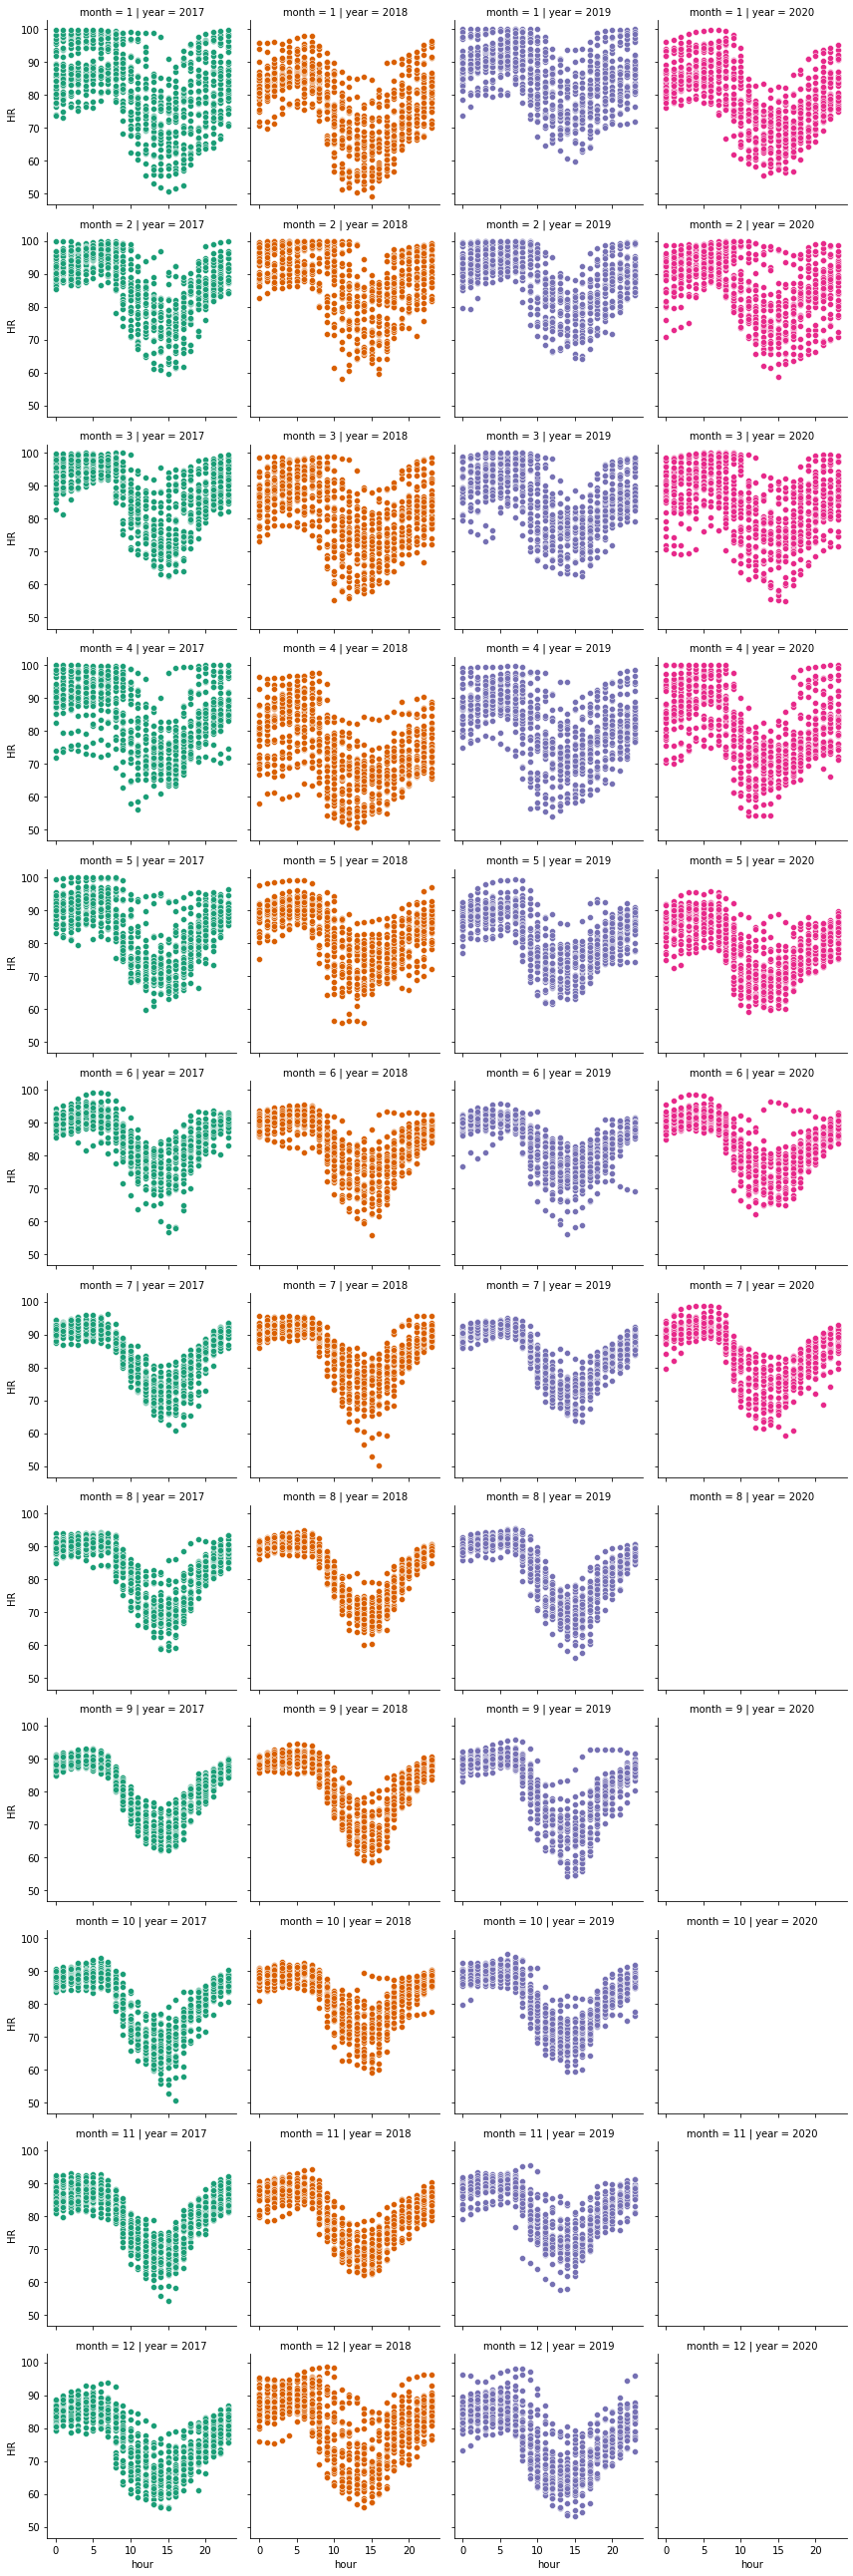

In [186]:
grid = sns.FacetGrid(df_total, col="year", row="month", hue="year", palette="Dark2")
grid.map(sns.scatterplot,tiempo,'HR')
plt.show()

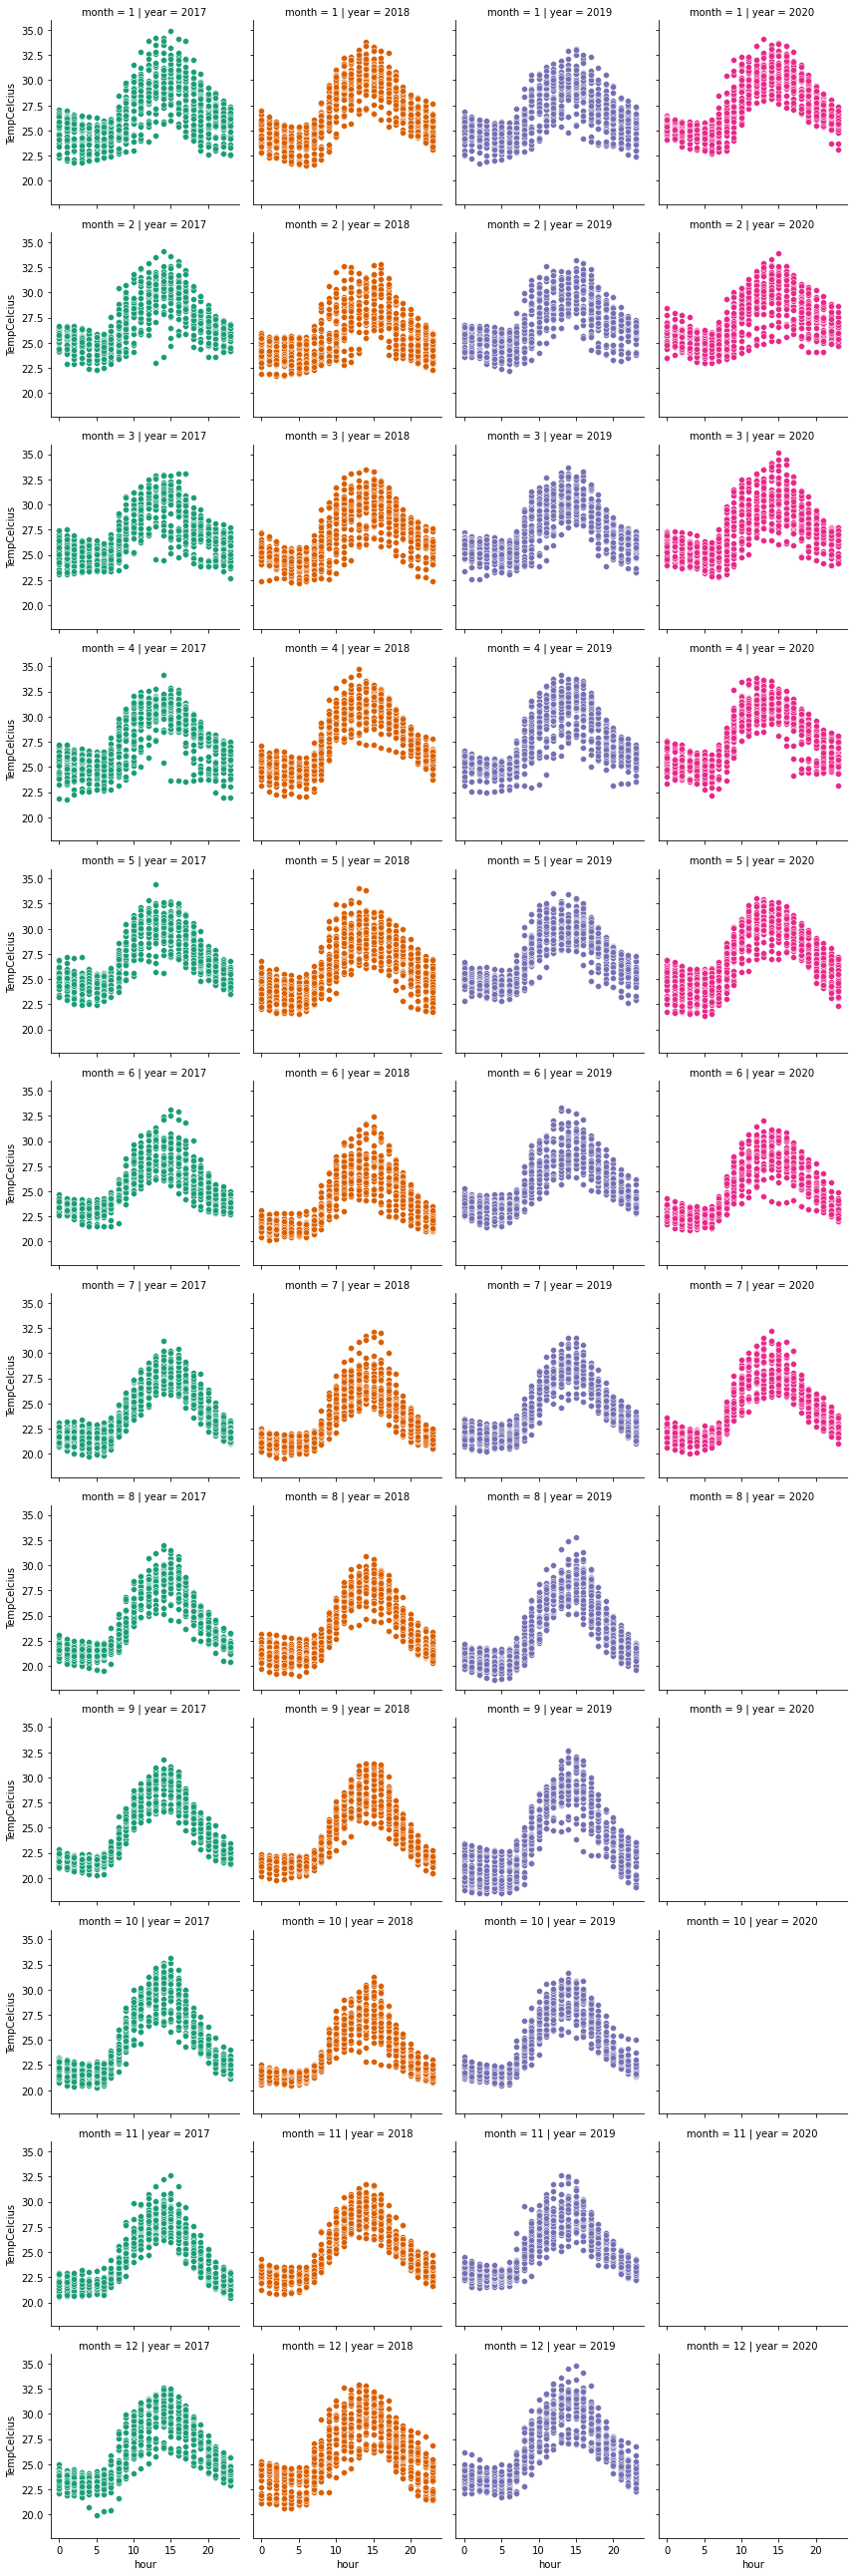

In [187]:
grid = sns.FacetGrid(df_total, col="year", row="month", hue="year", palette="Dark2")
grid.map(sns.scatterplot,tiempo,'TempCelcius')
plt.show()

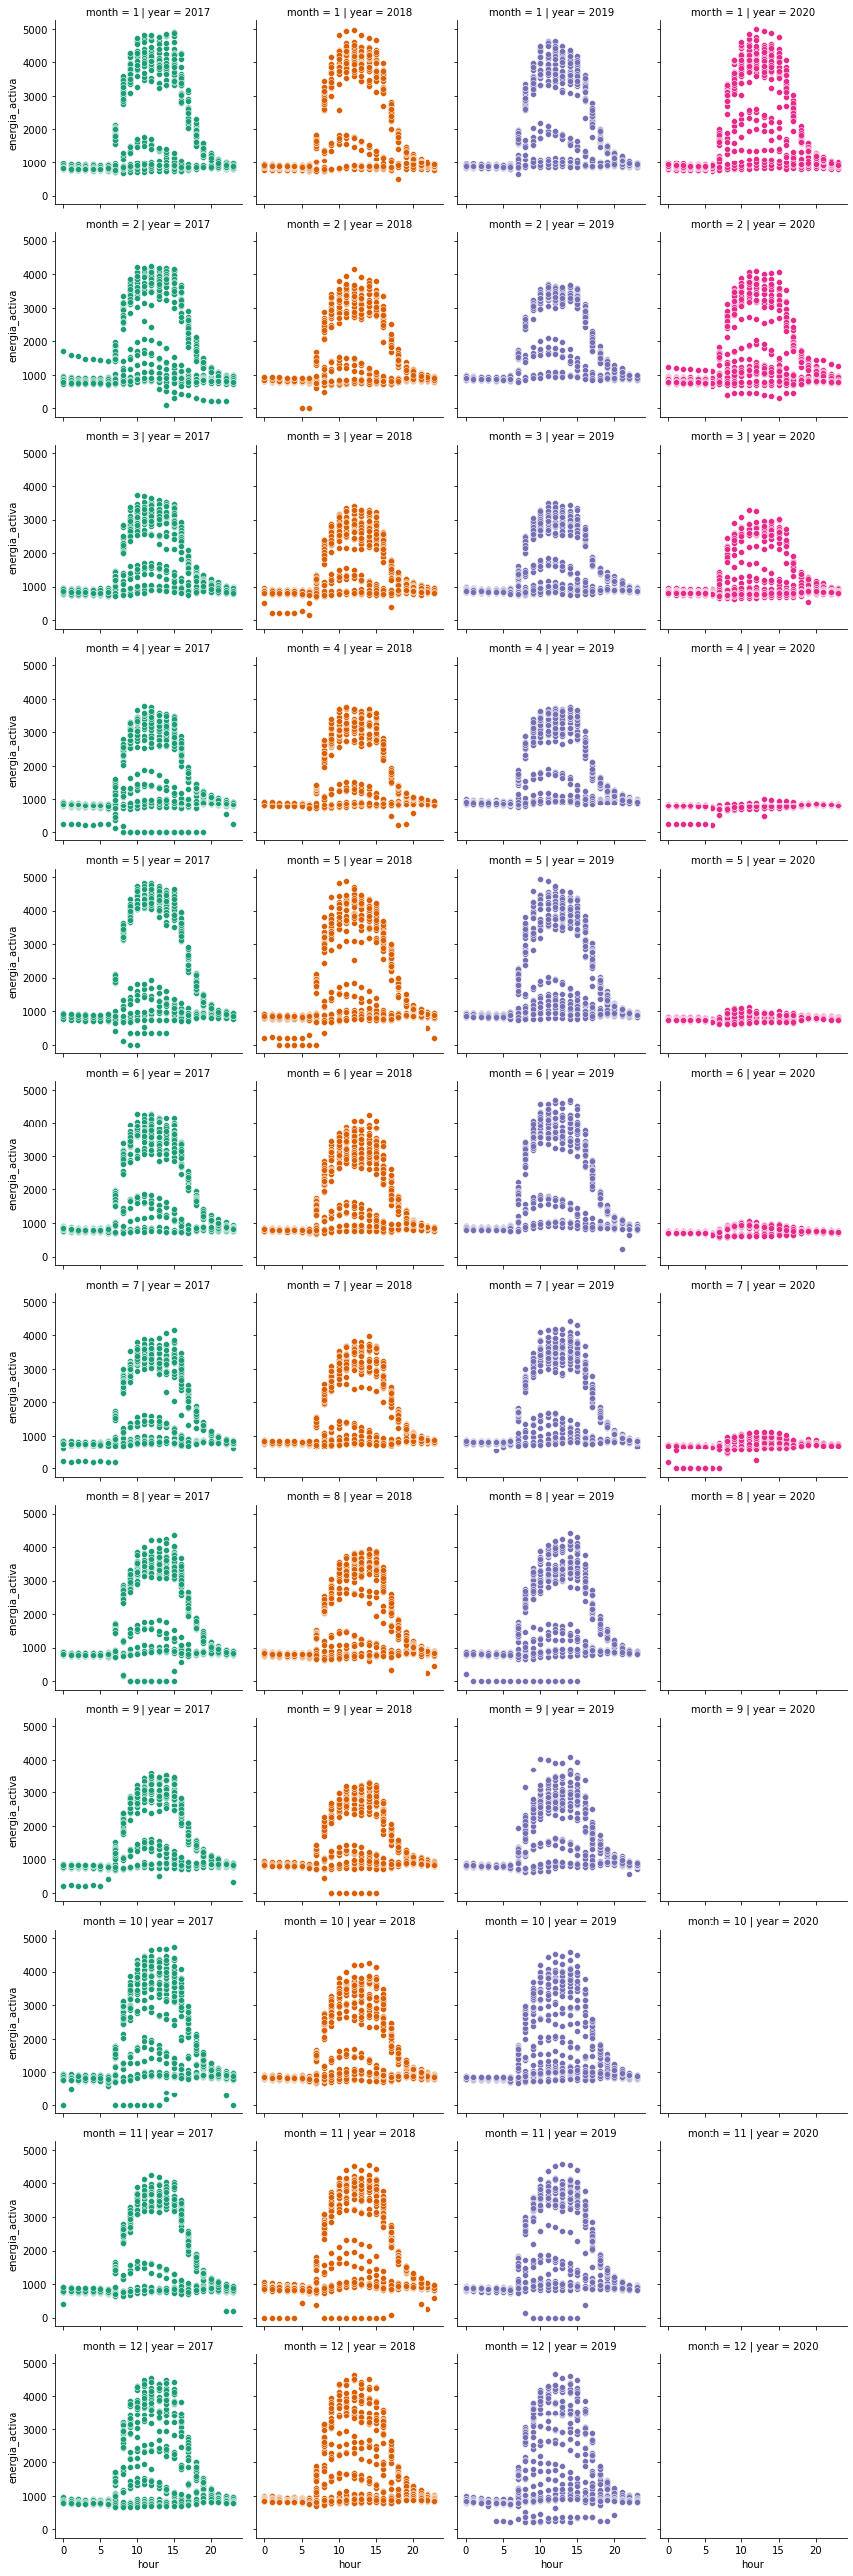

In [188]:
grid = sns.FacetGrid(df_total, col="year", row="month", hue="year", palette="Dark2")
grid.map(sns.scatterplot,tiempo,'energia_activa')
plt.show()

In [189]:
ordered_year = sorted(df_total['year'].unique())

In [190]:
ordered_month = sorted(df_total['month'].unique())

In [191]:
ordered_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [192]:
ordered_year 

[2017, 2018, 2019, 2020]

In [193]:
ordered_ = sorted(df_total['energia_activa'].unique())

C:\Users\francisco\miniconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


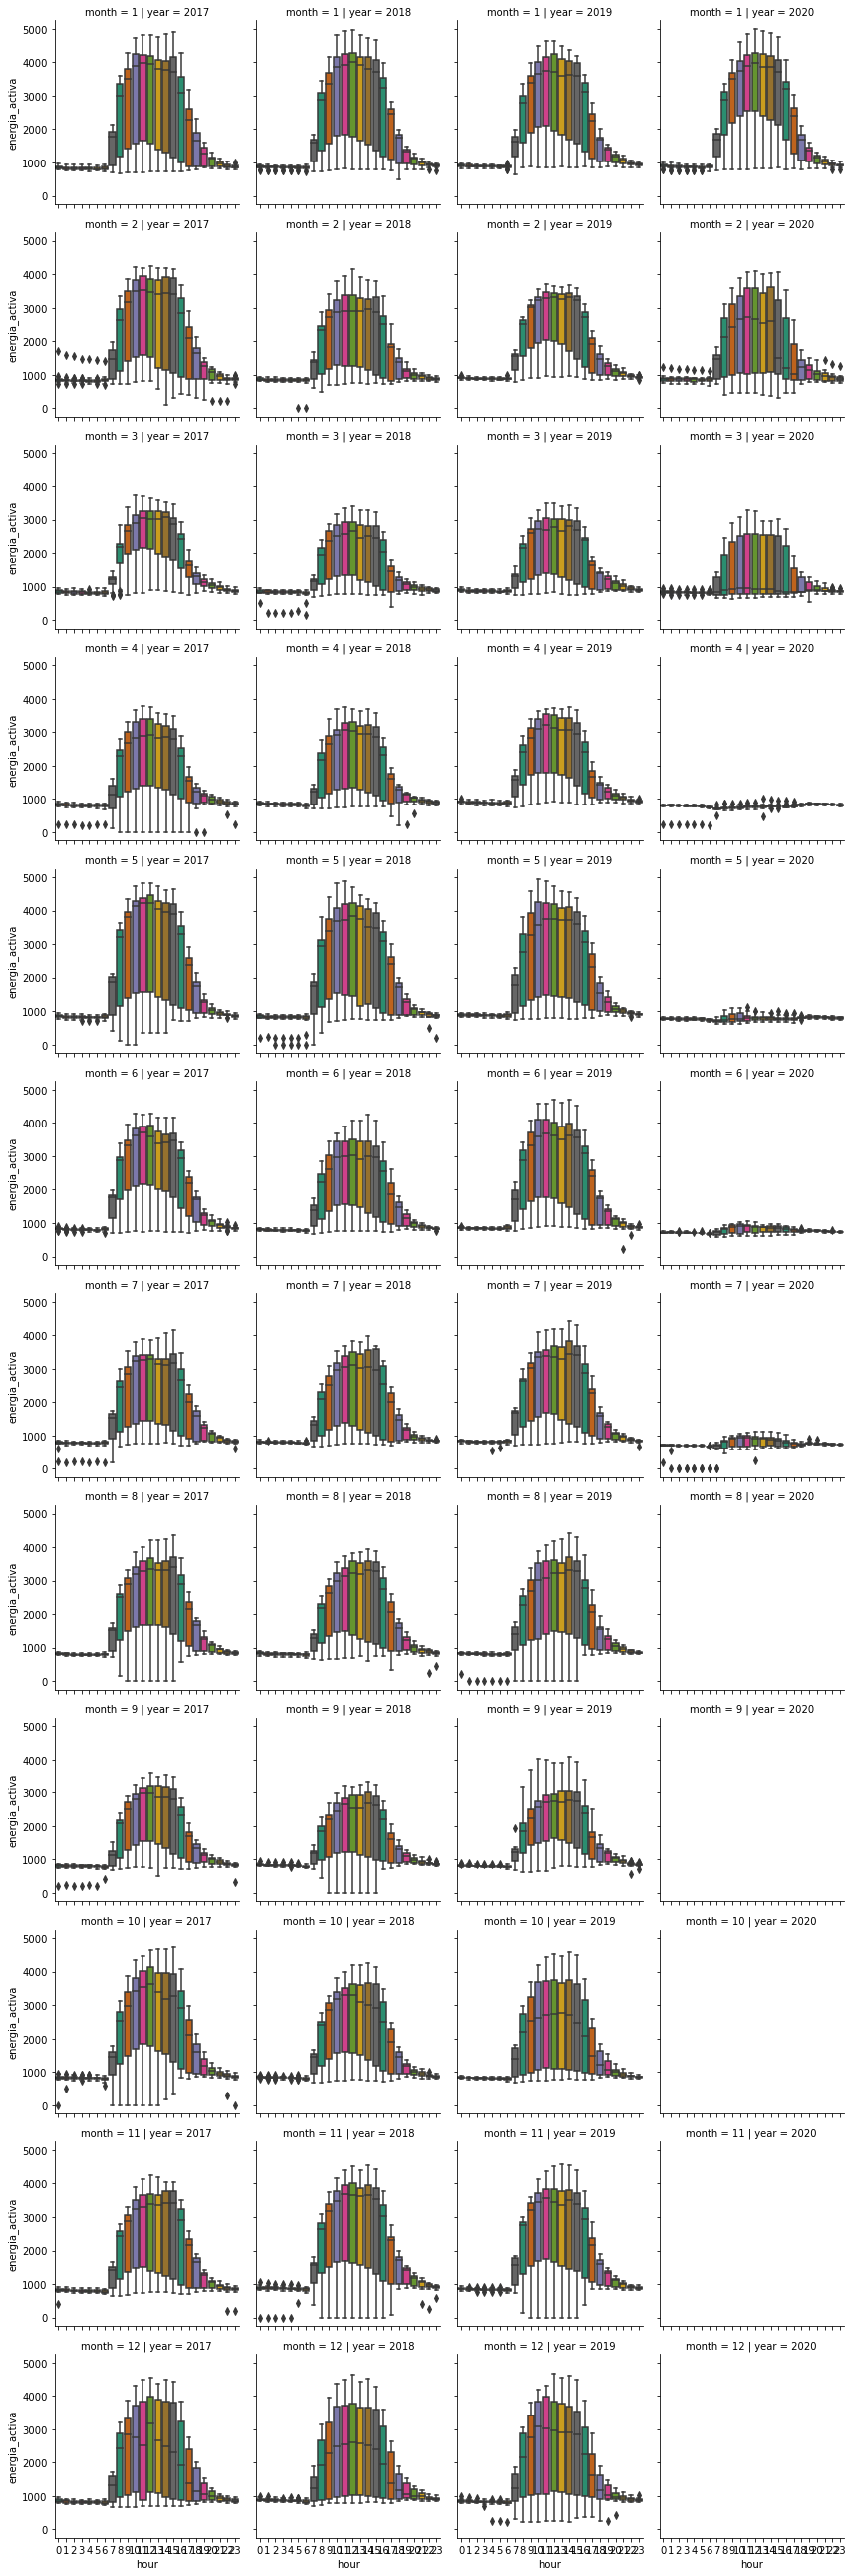

In [194]:
grid = sns.FacetGrid(df_total, col="year", row="month")
grid.map(sns.boxplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()

C:\Users\francisco\miniconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


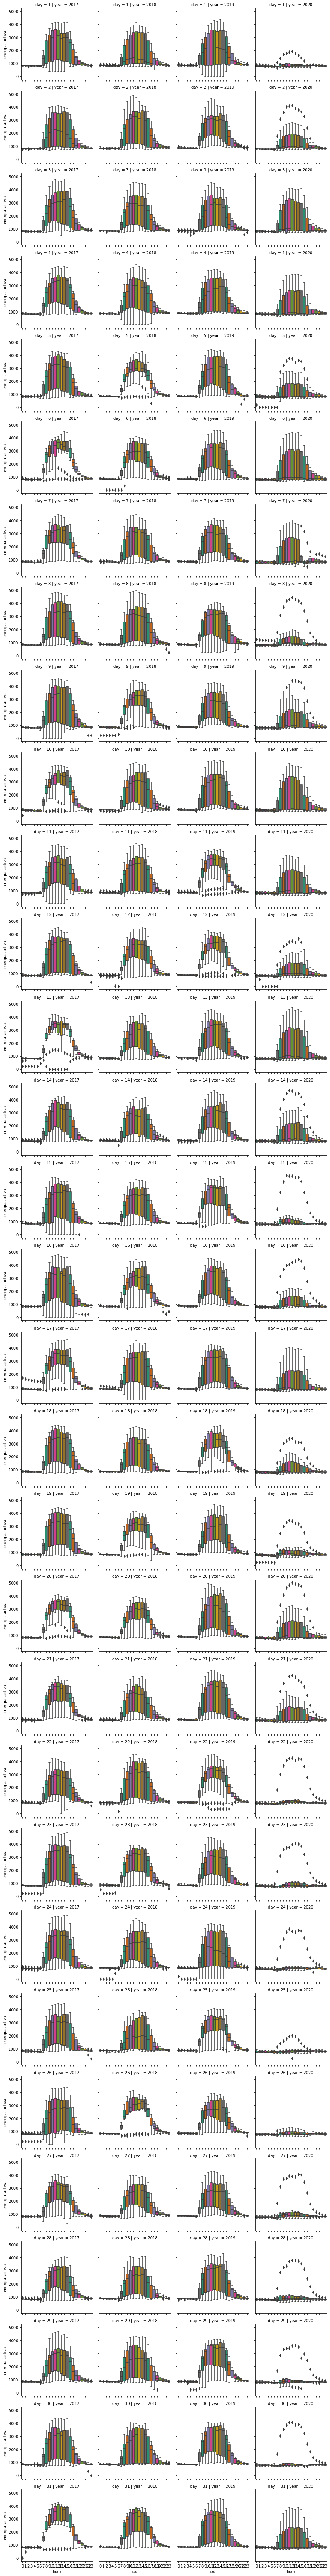

In [195]:
grid = sns.FacetGrid(df_total, col="year", row="day")
grid.map(sns.boxplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()

C:\Users\francisco\miniconda3\envs\torch\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


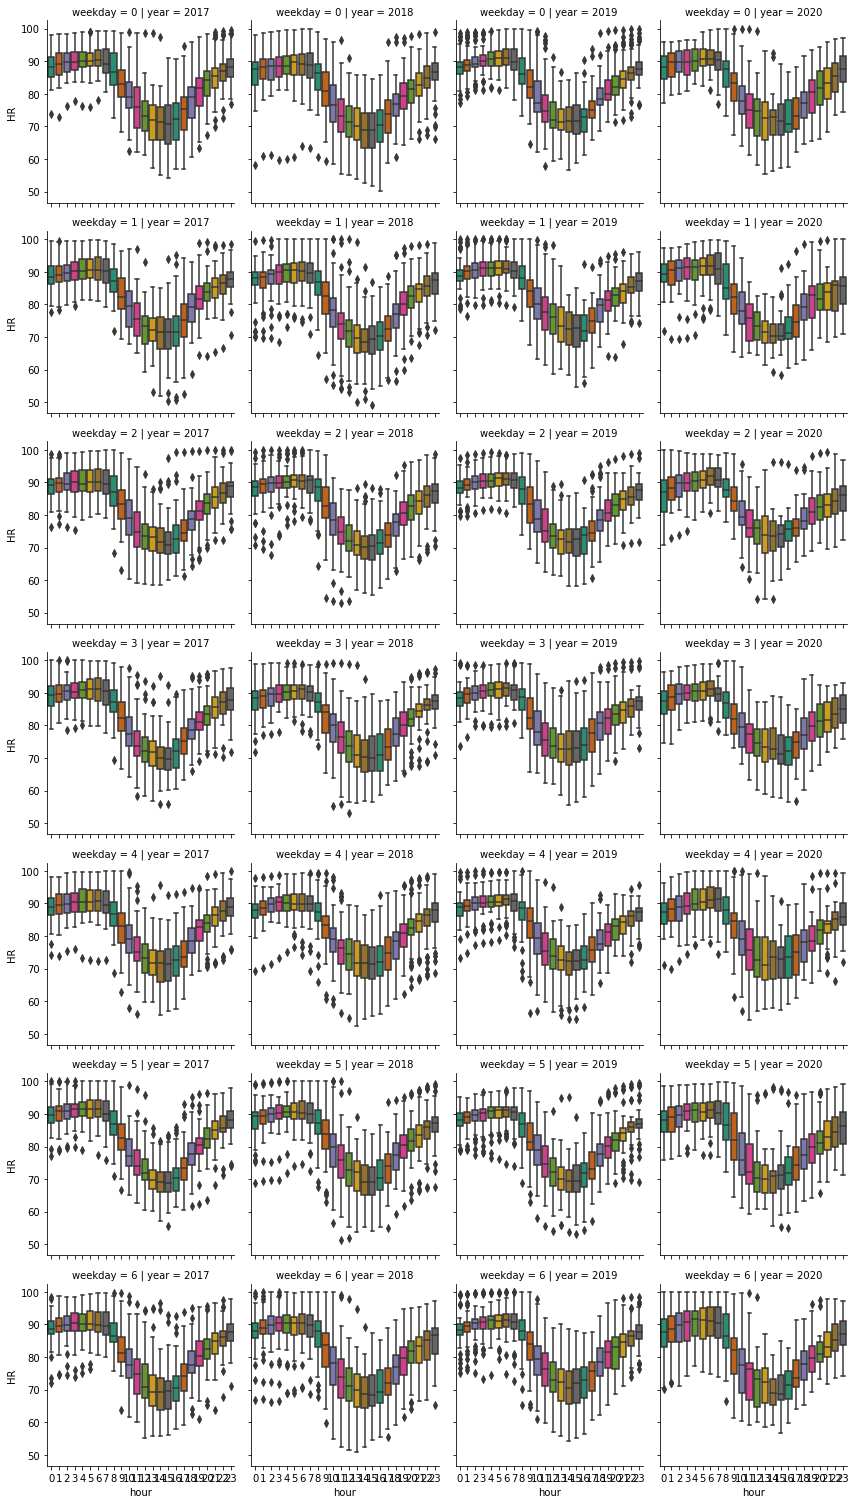

In [196]:
grid = sns.FacetGrid(df_total, col="year", row="weekday")
grid.map(sns.boxplot,tiempo,'HR', data=df_total,palette="Dark2")
plt.show()

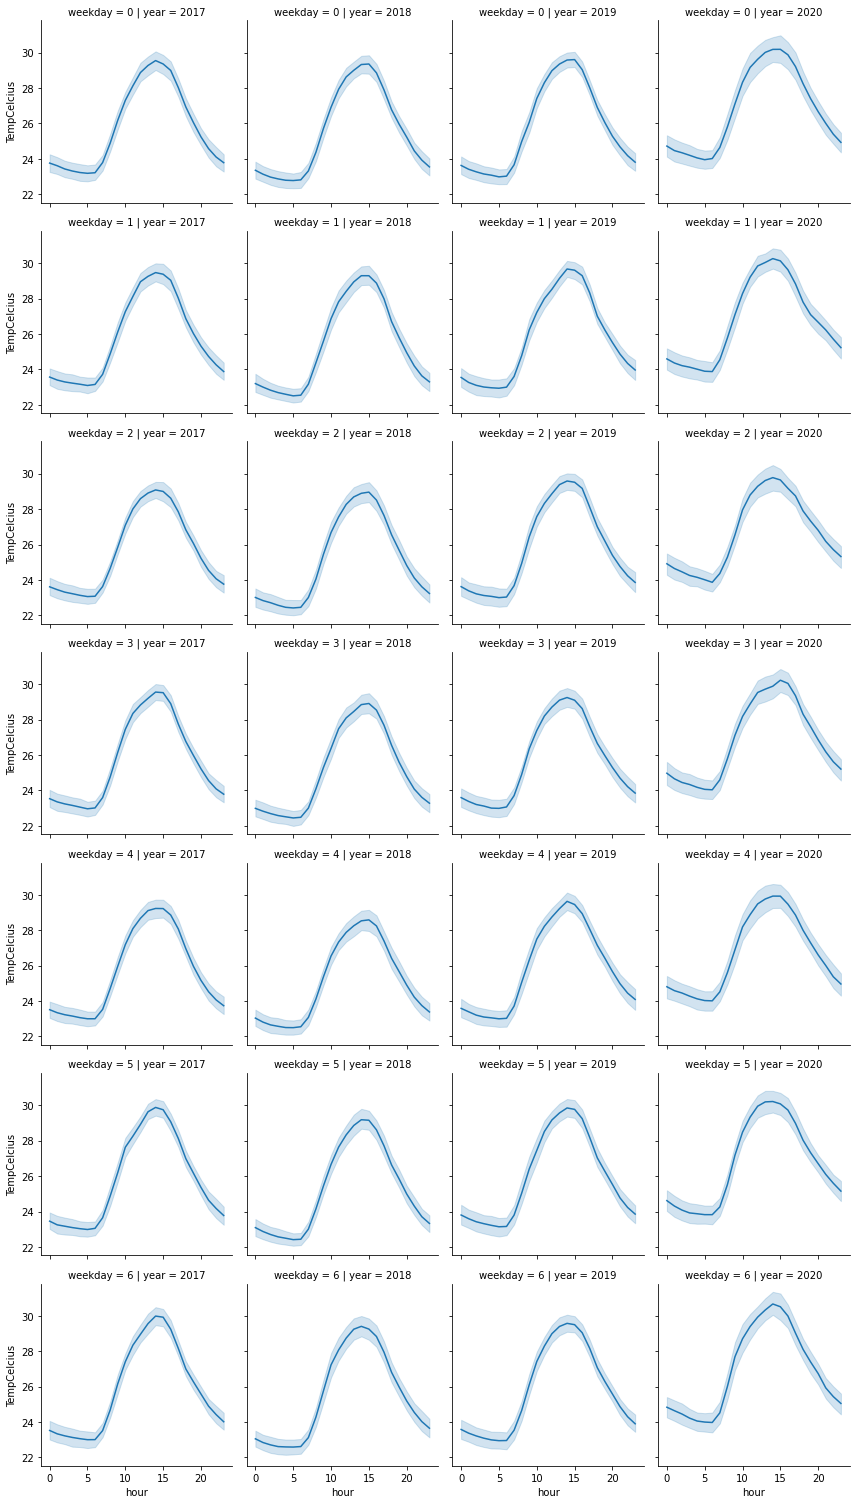

In [197]:
grid = sns.FacetGrid(df_total, col="year", row="weekday")
grid.map(sns.lineplot,tiempo,'TempCelcius', data=df_total,palette="Dark2")
plt.show()

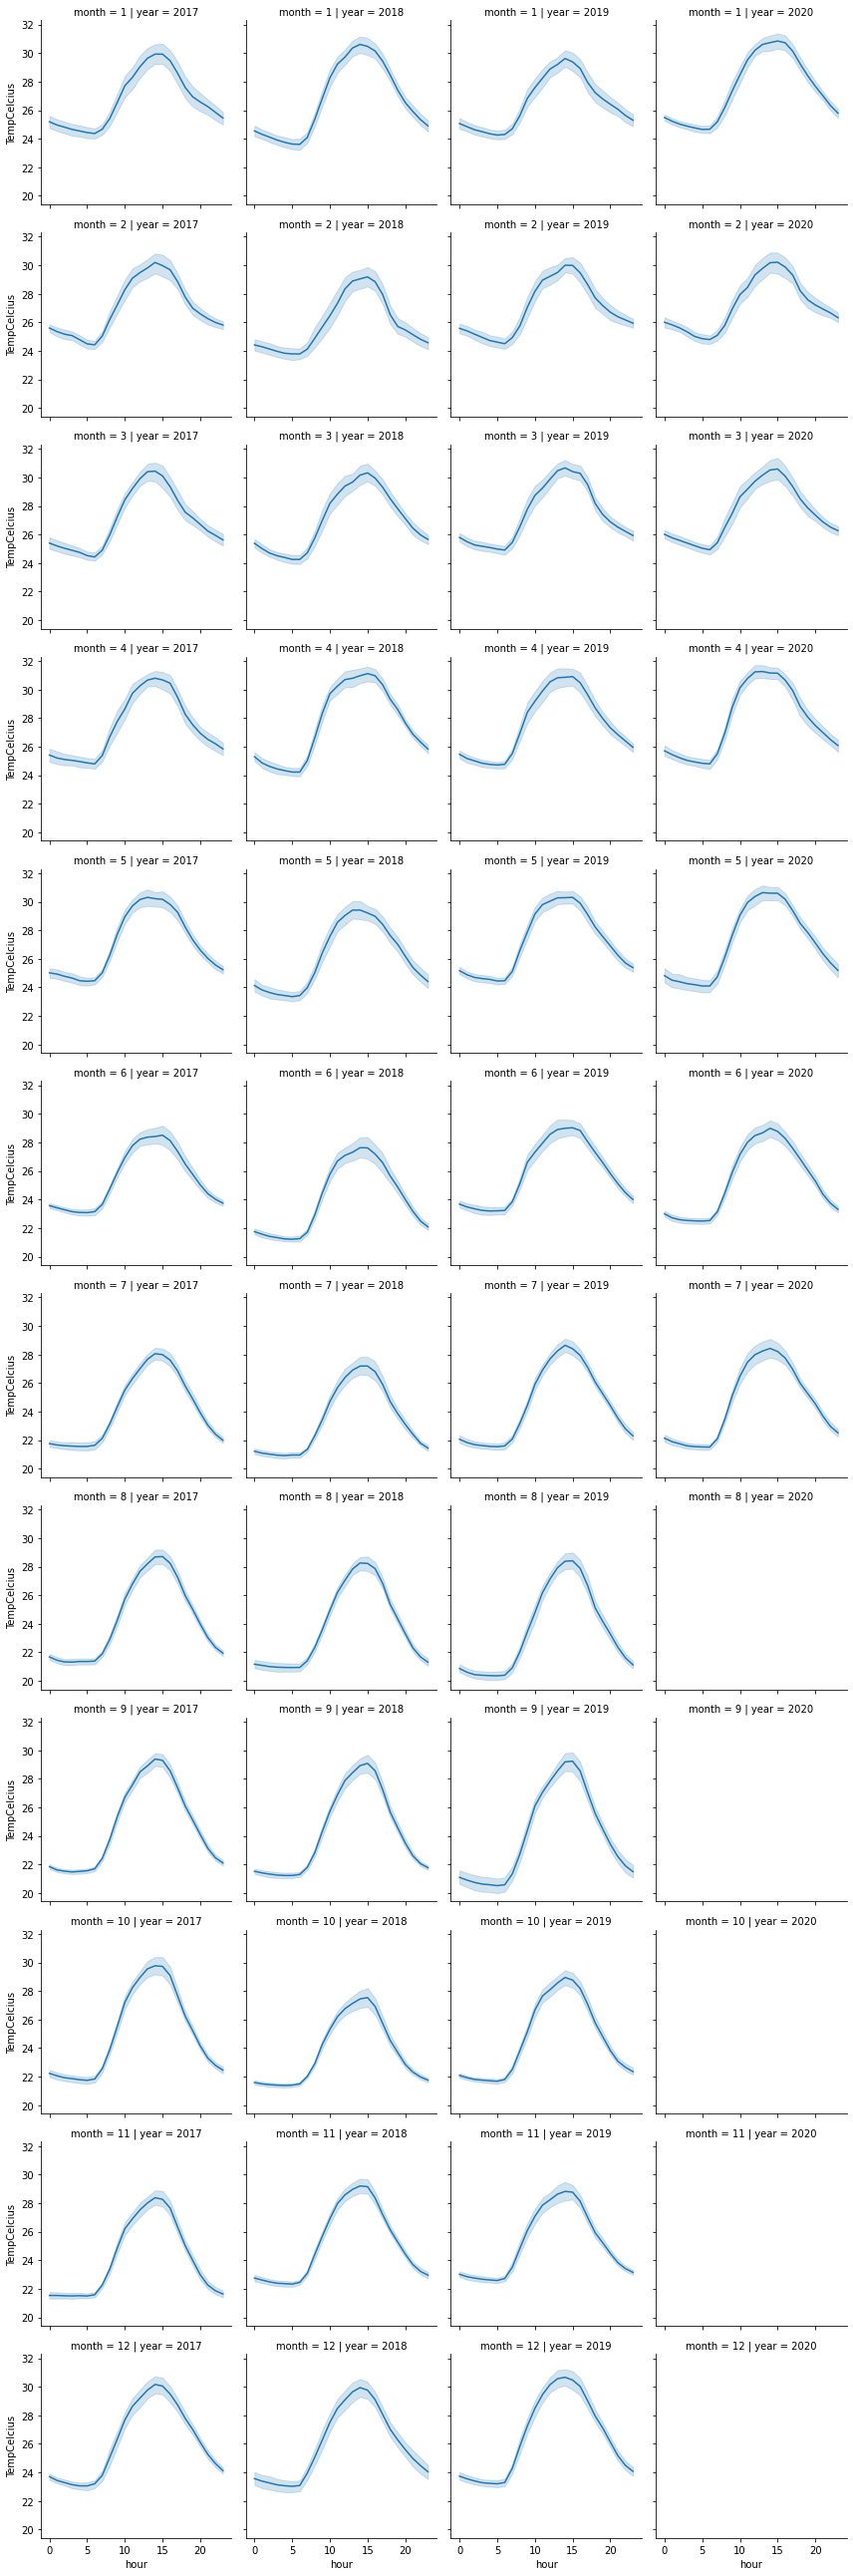

In [198]:
grid = sns.FacetGrid(df_total, col="year", row="month")
grid.map(sns.lineplot,tiempo,'TempCelcius', data=df_total,palette="Dark2")
plt.show()

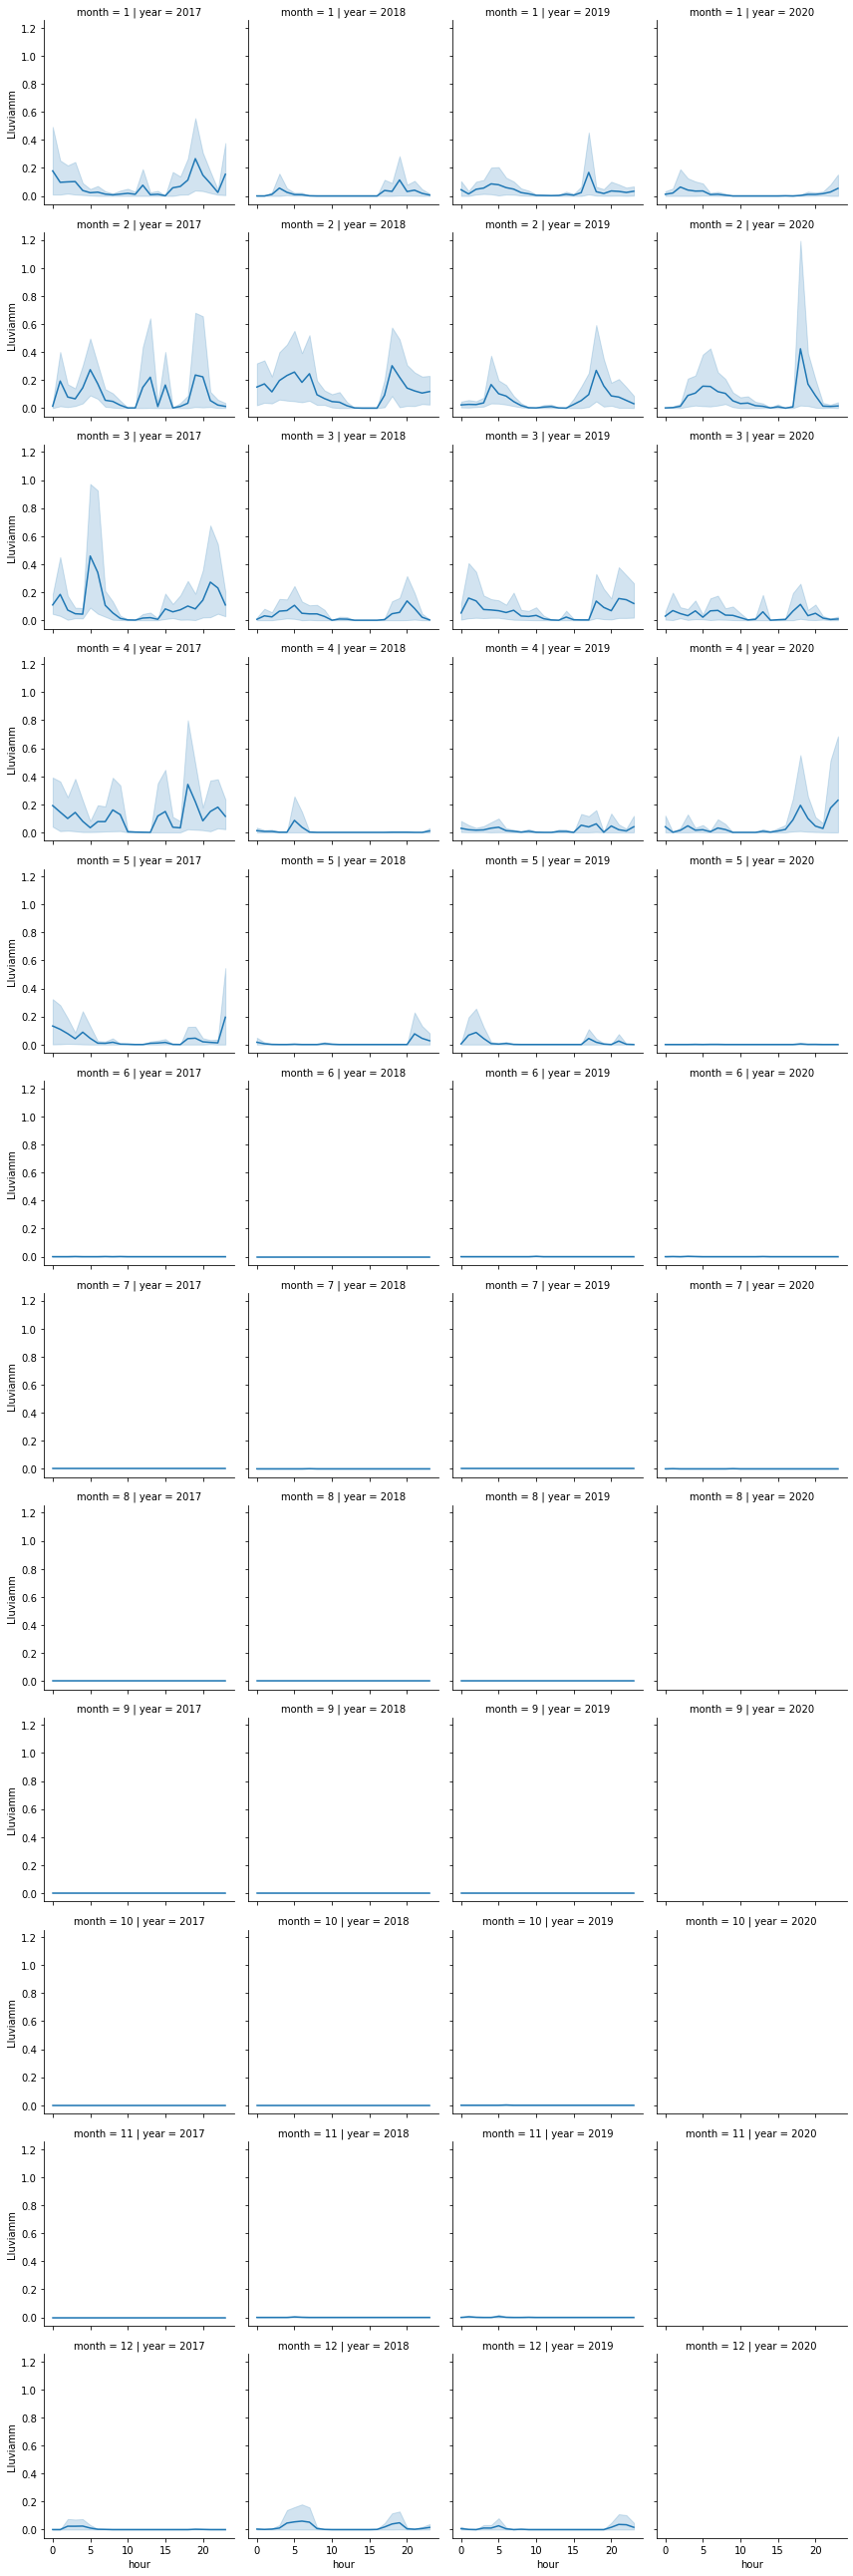

In [199]:
grid = sns.FacetGrid(df_total, col="year", row="month")
grid.map(sns.lineplot,tiempo,'Lluviamm', data=df_total,palette="Dark2")
plt.show()

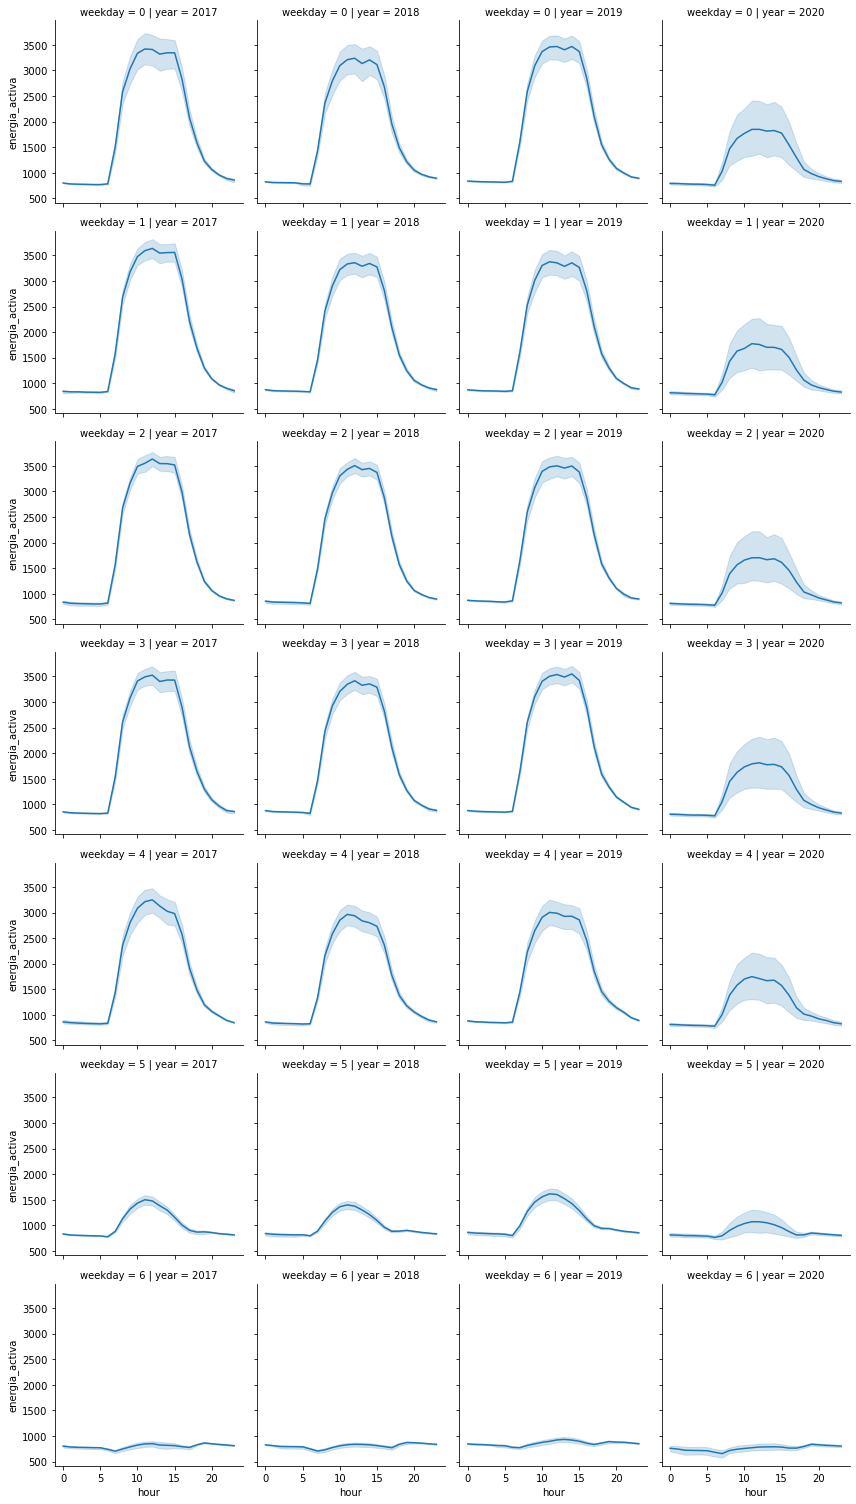

In [200]:
grid = sns.FacetGrid(df_total, col="year", row="weekday")
grid.map(sns.lineplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()

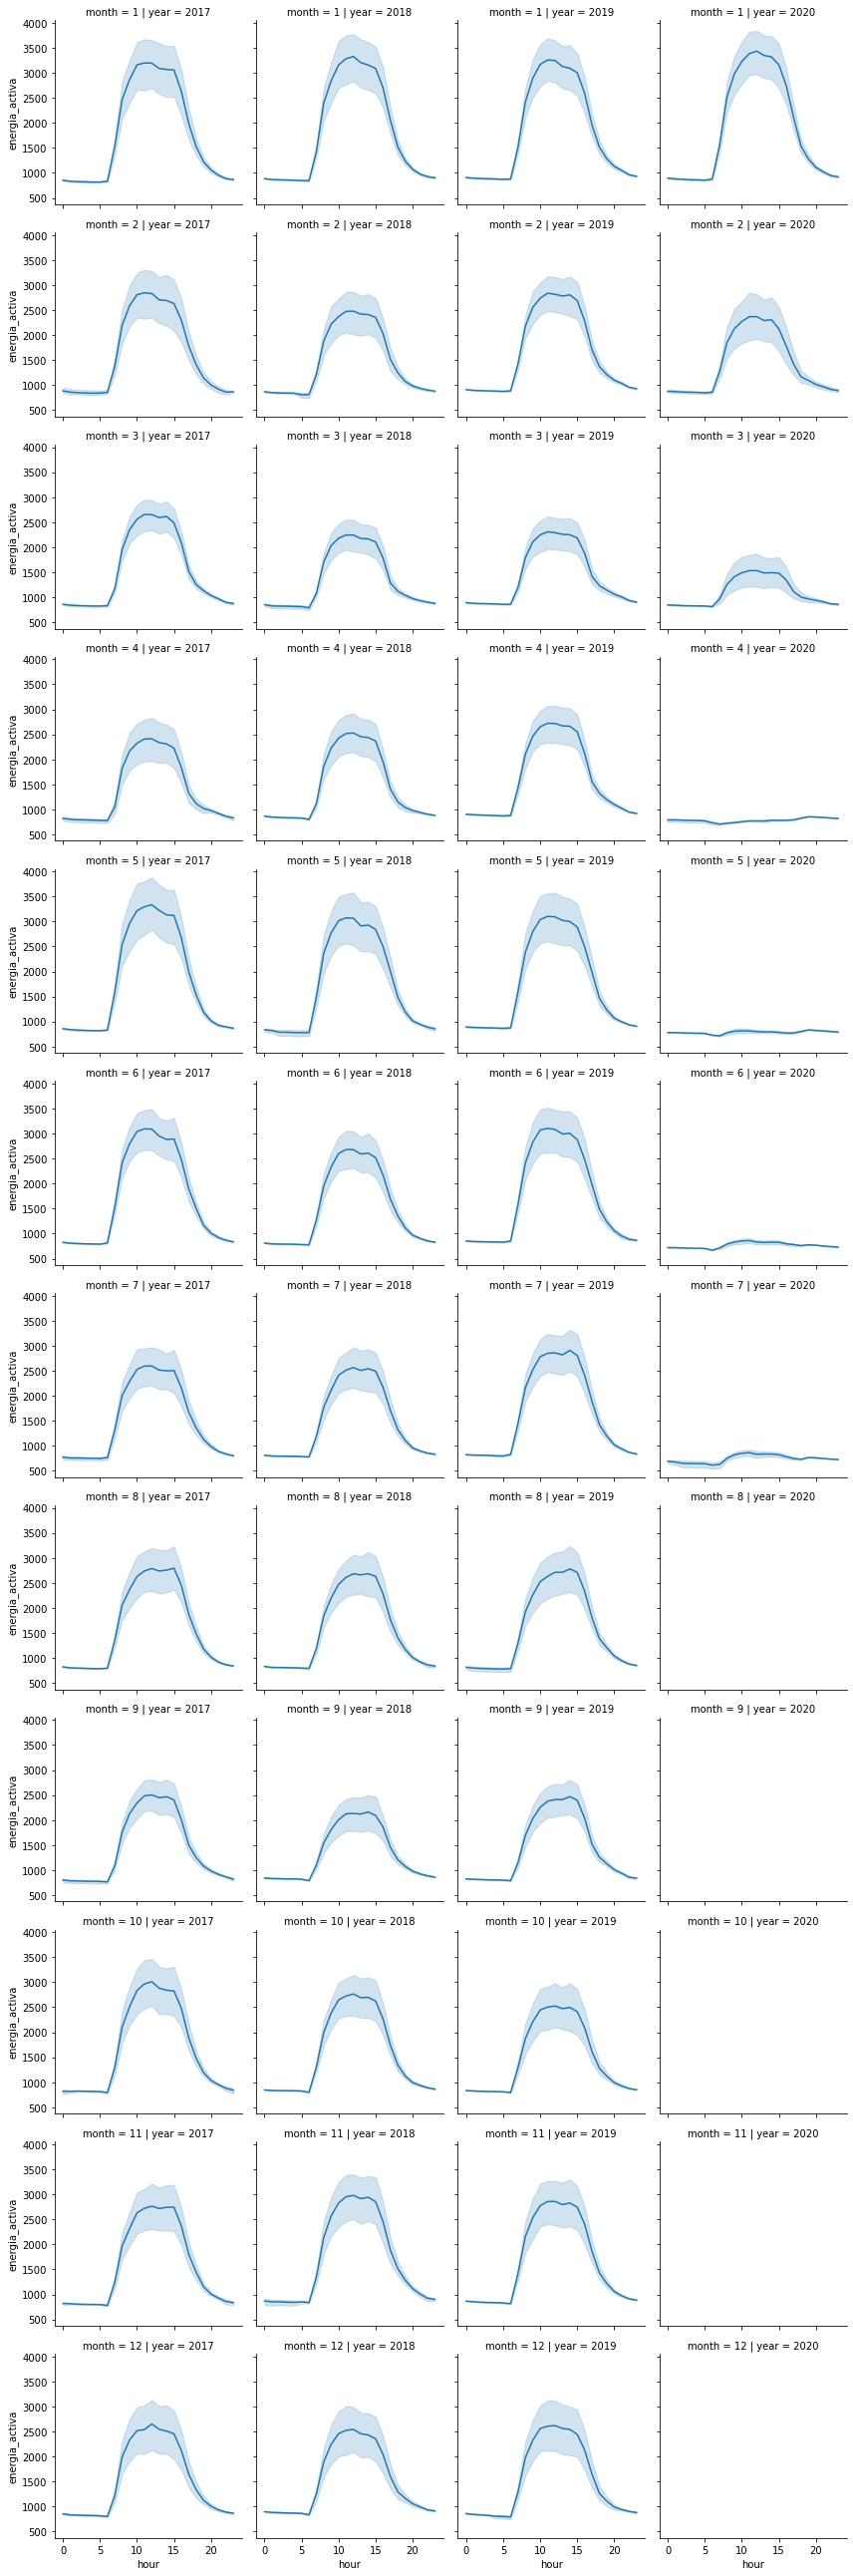

In [201]:
grid = sns.FacetGrid(df_total, col="year", row="month")
grid.map(sns.lineplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()

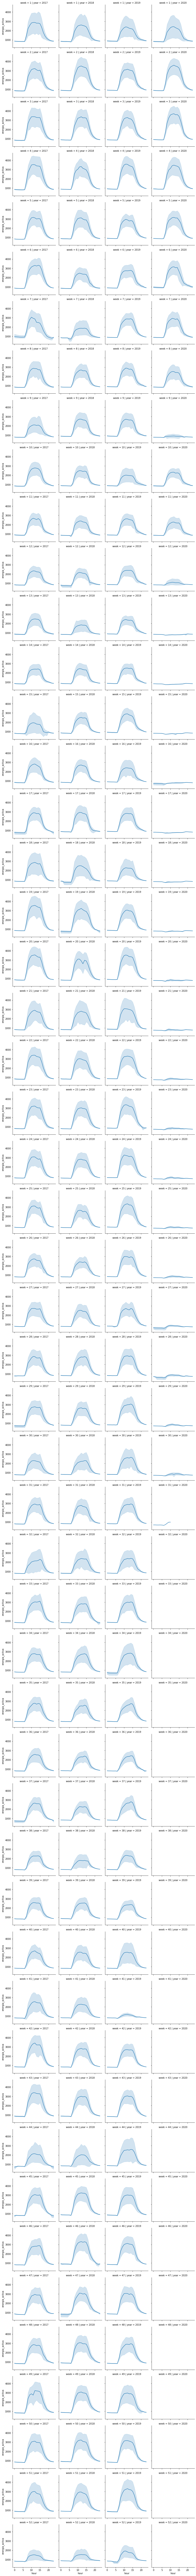

In [202]:
grid = sns.FacetGrid(df_total, col="year", row="week")
grid.map(sns.lineplot,tiempo,'energia_activa', data=df_total,palette="Dark2")
plt.show()